In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dif = pd.read_csv('https://raw.githubusercontent.com/elakiricoder/Gender_Classification_Support_Vector_Machines_SVM/main/gender_classification_v7.csv', index_col = 0)
dif.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Male
long_hair,,,,,,,
1,11.8,6.1,1,0,1,1,1
0,14.0,5.4,0,0,1,0,0
0,11.8,6.3,1,1,1,1,1
0,14.4,6.1,0,1,1,1,1
1,13.5,5.9,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(dif.drop('Male',axis=1))
df = pd.DataFrame(arr,columns = dif.columns[:-1])
x_all = df
y_all = dif['Male']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.33, random_state=44)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
predict = knn.predict(x_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test,predict)
matrix

array([[818,  32],
       [ 35, 766]])

In [8]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       850
           1       0.96      0.96      0.96       801

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



In [9]:
error_rate = []
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

In [10]:
from sklearn.model_selection import GridSearchCV
params_rate = {'n_neighbors':range(1,31)}
grid = GridSearchCV(knn,params_rate,cv=10,scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=99),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy',
             verbose=1)

In [11]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 30}
0.9701492537313433


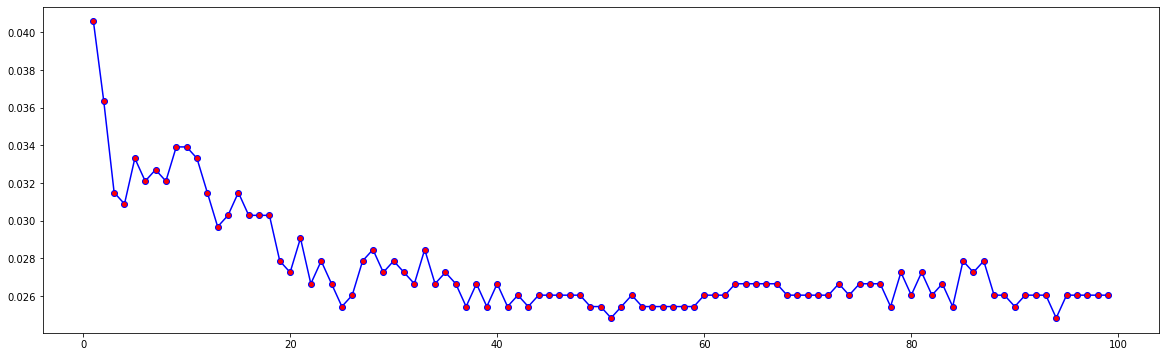

In [12]:
plt.figure(figsize=(20,6))
plt.plot(range(1,100),error_rate,c='b',marker='o',markerfacecolor='r')
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
score = knn.predict(x_test)
matrix = confusion_matrix(y_test,score)
print(matrix)
print(classification_report(y_test,score))

[[835  15]
 [ 31 770]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       850
           1       0.98      0.96      0.97       801

    accuracy                           0.97      1651
   macro avg       0.97      0.97      0.97      1651
weighted avg       0.97      0.97      0.97      1651

